In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [5]:
FILE = 'dataset_TAG_full.csv'
df = pd.read_csv(FILE, delimiter= ';')
print(df.columns)
print(len(df))

Index(['Name', 'iupac', 'iupac-common name', 'omega', 'delta', 'InChI',
       'SMILES', '[kJ /mol ]', '[C ]', 'Unnamed: 9'],
      dtype='object')
211


In [6]:
df.head(2)

,Name,iupac,iupac-common name,omega,delta,InChI,SMILES,[kJ /mol ],[C ],Unnamed: 9
0,66S,"3-(octadecanoyloxy)propane-1,2-diyl dihexanate","3-(stearoyloxy)propane-1,2-diyl dicaprate",1(6:0)-2(6:0)-3(18:0),1(6:0)-2(6:0)-3(18:0),InChI=1S/C33H62O6/c1-4-7-10-11-12-13-14-15-16-...,O=C(CCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCC)OC(=O)C...,NaN,22.6,0
1,66B,"3-(docosanoicoyloxy)propane-1,2-diyl dihexanate","3-(behenoyloxy)propane-1,2-diyl dicaprate",1(6:0)-2(6:0)-3(22:0),1(6:0)-2(6:0)-3(22:0),InChI=1S/C37H70O6/c1-4-7-10-11-12-13-14-15-16-...,O=C(CCCCCCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCC)OC(...,NaN,34.0,0


In [7]:
df.dropna(subset='[C ]', inplace=True)
df['mp_bin'] = pd.qcut(df['[C ]'], 2, labels=[0,1])

45.1


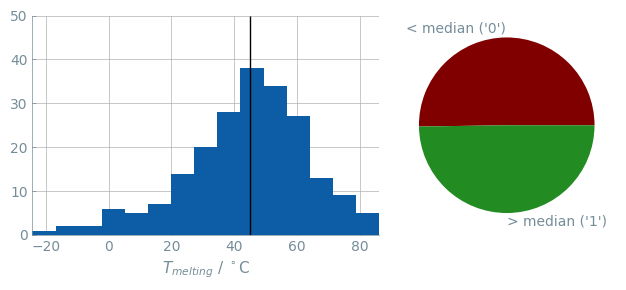

In [8]:
fig, ax = plt.subplots(1,2, tight_layout = True, figsize = (7,3))
ax  = ax.flatten()
df['[C ]'].hist(ax = ax[0], bins = 15)
ax[0].vlines(df['[C ]'].median(), 0, 50, colors = 'black')
ax[0].set_xlabel('$T_{melting}$ / $^\circ$C')
print(df['[C ]'].median())
ax[1].pie([df['mp_bin'].tolist().count(0), df['mp_bin'].tolist().count(1)],labels = ['< median (\'0\')', '> median (\'1\')'], colors = ['maroon', 'forestgreen'])
plt.savefig('fats_distribution.pdf')

In [9]:
df.to_csv('fats_data.csv')

In [10]:
df_2 = pd.read_csv('fats_data.csv')
df_2

,Unnamed: 0,Name,iupac,iupac-common name,omega,delta,InChI,SMILES,[kJ /mol ],[C ],Unnamed: 9,mp_bin
0,0,66S,"3-(octadecanoyloxy)propane-1,2-diyl dihexanate","3-(stearoyloxy)propane-1,2-diyl dicaprate",1(6:0)-2(6:0)-3(18:0),1(6:0)-2(6:0)-3(18:0),InChI=1S/C33H62O6/c1-4-7-10-11-12-13-14-15-16-...,O=C(CCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCC)OC(=O)C...,NaN,22.6,0,0
1,1,66B,"3-(docosanoicoyloxy)propane-1,2-diyl dihexanate","3-(behenoyloxy)propane-1,2-diyl dicaprate",1(6:0)-2(6:0)-3(22:0),1(6:0)-2(6:0)-3(22:0),InChI=1S/C37H70O6/c1-4-7-10-11-12-13-14-15-16-...,O=C(CCCCCCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCC)OC(...,NaN,34.0,0,0
2,2,6S6,"2-(octadecanoyloxy)propane-1,3-diyl dihexanate","2-(stearoyloxy)propane-1,3-diyl dicaprate",1(6:0)-2(18:0)-3(6:0),1(6:0)-2(18:0)-3(6:0),InChI=1S/C33H62O6/c1-4-7-10-11-12-13-14-15-16-...,O=C(CCCCC)OCC(COC(=O)CCCCC)OC(=O)CCCCCCCCCCCCC...,NaN,32.0,0,0
3,3,8.8.8(a ),"propane-1,2,3-triyl octanate","propane-1,2,3-triyl caprylate",1(8:0)-2(8:0)-3(8:0),1(8:0)-2(8:0)-3(8:0),InChI=1S/C27H50O6/c1-4-7-10-13-16-19-25(28)31-...,O=C(CCCCCCC)OCC(COC(=O)CCCCCCC)OC(=O)CCCCCCC,69.5,11.0,0,0
4,4,8.8.8,"propane-1,2,3-triyl octanate","propane-1,2,3-triyl caprylate",1(8:0)-2(8:0)-3(8:0),1(8:0)-2(8:0)-3(8:0),InChI=1S/C27H50O6/c1-4-7-10-13-16-19-25(28)31-...,O=C(CCCCCCC)OCC(COC(=O)CCCCCCC)OC(=O)CCCCCCC,69.2,9.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,SOS,"2-((Z)-Octadec-9-enoyloxy)propane-1,3-diyl dio...","2-(oleoyloxy)propane-1,3-diyl distearate","1(18:0)-2(18:1,w-9)-3(18:0)",1(18:0)-2(18:1 D9)-3(18:0),InChI=1S/C57H108O6/c1-4-7-10-13-16-19-22-25-28...,O=C(CCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCCCCCCCCCC...,NaN,44.0,0,0
207,207,SOS (d ),"2-((Z)-Octadec-9-enoyloxy)propane-1,3-diyl dio...","2-(oleoyloxy)propane-1,3-diyl distearate","1(18:0)-2(18:1,w-9)-3(18:0)",1(18:0)-2(18:1 D9)-3(18:0),InChI=1S/C57H108O6/c1-4-7-10-13-16-19-22-25-28...,O=C(CCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCCCCCCCCCC...,NaN,43.0,0,0
208,208,SOS (m ),"2-((Z)-Octadec-9-enoyloxy)propane-1,3-diyl dio...","2-(oleoyloxy)propane-1,3-diyl distearate","1(18:0)-2(18:1,w-9)-3(18:0)",1(18:0)-2(18:1 D9)-3(18:0),InChI=1S/C57H108O6/c1-4-7-10-13-16-19-22-25-28...,O=C(CCCCCCCCCCCCCCCCC)OCC(COC(=O)CCCCCCCCCCCCC...,151,43.0,0,0
209,209,SPO,1-(octadecanoyloxy)-2-(hexadecanoyloxy)propan-...,1-(stearoyloxy)-2-(palmitoyloxy)propan-3-yl ol...,"1(18:0)-2(16:0)-3(18:1,w-9)",1(18:0)-2(16:0)-3(18:1 D9),InChI=1S/C55H104O6/c1-4-7-10-13-16-19-22-25-27...,O=C(CCCCCCC/C=C\CCCCCCCC)OCC(COC(=O)CCCCCCCCCC...,126,40.2,0,0
